# 构建基础数据

In [78]:
import numpy as np
from numpy.random import normal

def genData():
    heights = []
    weights = []
    grades = []
    N = 10000

    for i in range(N):
        while True:
            #身高服从均值172，标准差为6的正态分布
            height = normal(172, 6)
            if 0 < height: break
        while True:
            #体重由身高作为自变量的线性回归模型产生，误差服从标准正态分布
            weight = (height - 80) * 0.7 + normal(0, 1)
            if 0 < weight: break
        while True:
            #分数服从均值为70，标准差为15的正态分布
            score = normal(70, 15)
            if 0 <= score and score <= 100:
                grade = 'E' if score < 60 else ('D' if score < 70 else ('C' if score < 80 else ('B' if score < 90 else 'A')))
                break
        heights.append(height)
        weights.append(weight)
        grades.append(grade)
    return np.array(heights), np.array(weights), np.array(grades)

heights, weights, grades = genData()

# 数值分析

## 中心位置：均值、中位数、众数

In [79]:
data = np.array([1,2,3,4,5,6,7,7])

In [80]:
np.mean(data)
np.median(data)
# 众数
from scipy.stats import mode
mode(data)

ModeResult(mode=array([7]), count=array([2]))

## 发散程度：方差、标准差、极差

In [81]:
np.var(data)
np.std(data)

2.117634293262177

In [82]:
# 极差：max - min
np.ptp(data)

6

## 偏差程度：z-score

In [83]:
(data[0]-np.mean(data))/np.std(data)

-1.5937596074725793

## 相关程度：协方差、相关系数

In [84]:
data = np.array([heights, weights])
data[0:3,0:3]

array([[ 176.46660894,  181.60703757,  164.93877381],
       [  68.96023943,   71.63883975,   59.77025262]])

In [85]:
# 协方差
np.cov(data, bias=1)

array([[ 35.772577  ,  24.98916744],
       [ 24.98916744,  18.46135924]])

In [86]:
# 相关系数
np.corrcoef(data)

array([[ 1.        ,  0.97239975],
       [ 0.97239975,  1.        ]])

In [95]:
# 皮尔逊相关系数
from scipy.stats import pearsonr
pearsonr(heights, weights)

(0.97239974611120328, 0.0)

# 画图分析

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

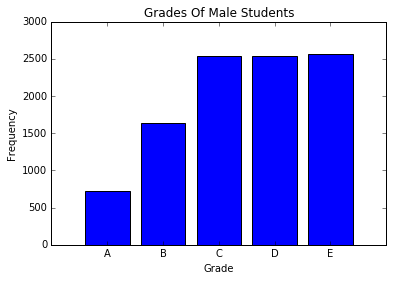

In [88]:
#绘制柱状图
def drawBar(grades):
    xticks = ['A', 'B', 'C', 'D', 'E']
    gradeGroup = {}
    #对每一类成绩进行频数统计
    for grade in grades:
        gradeGroup[grade] = gradeGroup.get(grade, 0) + 1
        
    #创建柱状图
    #第一个参数为柱的横坐标
    #第二个参数为柱的高度
    #参数align为柱的对齐方式，以第一个参数为参考标准
    x = range(5)
    y = [gradeGroup.get(tic, 0) for tic in xticks]
    plt.bar(x, y, align='center')

    #设置柱的文字说明
    #第一个参数为文字说明的横坐标
    #第二个参数为文字说明的内容
    plt.xticks(x, xticks)

    #设置横坐标的文字说明
    plt.xlabel('Grade')
    #设置纵坐标的文字说明
    plt.ylabel('Frequency')
    #设置标题
    plt.title('Grades Of Male Students')
    #绘图
    plt.show()

drawBar(grades)

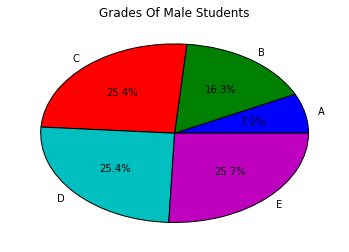

In [89]:
#绘制饼形图
def drawPie(grades):
    labels = ['A', 'B', 'C', 'D', 'E']
    gradeGroup = {}
    for x in labels:
        gradeGroup[x] = np.sum(grades==x)
        
    #创建饼形图
    #第一个参数为扇形的面积
    #labels参数为扇形的说明文字
    #autopct参数为扇形占比的显示格式
    x = [gradeGroup.get(label, 0) for label in labels]
    plt.pie(x, labels=labels, autopct='%1.1f%%')
    plt.title('Grades Of Male Students')
    plt.show()

drawPie(grades)

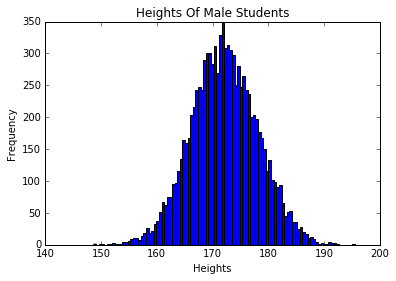

In [90]:
#绘制直方图
def drawHist(heights):
    #创建直方图
    #第一个参数为待绘制的定量数据，不同于定性数据，这里并没有事先进行频数统计
    #第二个参数为划分的区间个数
    plt.hist(heights, 100)
    plt.xlabel('Heights')
    plt.ylabel('Frequency')
    plt.title('Heights Of Male Students')
    plt.show()

drawHist(heights)

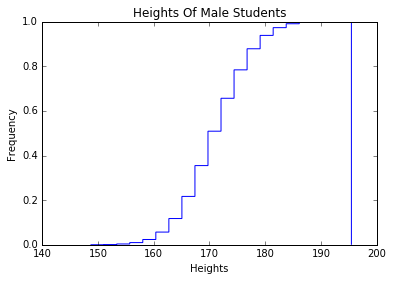

In [91]:
#绘制累积曲线
def drawCumulativeHist(heights):
    #创建累积曲线
    #第一个参数为待绘制的定量数据
    #第二个参数为划分的区间个数
    #normed参数为是否无量纲化
    #histtype参数为'step'，绘制阶梯状的曲线
    #cumulative参数为是否累积
    plt.hist(heights, 20, normed=True, histtype='step', cumulative=True)
    plt.xlabel('Heights')
    plt.ylabel('Frequency')
    plt.title('Heights Of Male Students')
    plt.show()

drawCumulativeHist(heights)

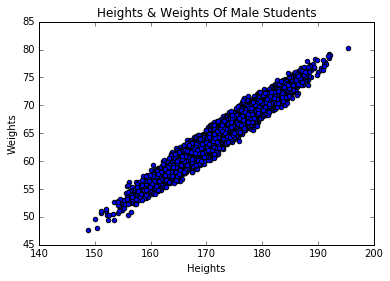

In [92]:
#绘制散点图
def drawScatter(heights, weights):
    #创建散点图
    #第一个参数为点的横坐标
    #第二个参数为点的纵坐标
    plt.scatter(heights, weights)
    plt.xlabel('Heights')
    plt.ylabel('Weights')
    plt.title('Heights & Weights Of Male Students')
    plt.show()

drawScatter(heights, weights)

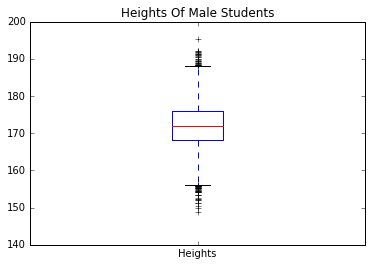

In [93]:
#绘制箱形图
def drawBox(heights):
    #创建箱形图
    #第一个参数为待绘制的定量数据
    #第二个参数为数据的文字说明
    plt.boxplot([heights], labels=['Heights'])
    plt.title('Heights Of Male Students')
    plt.show()

drawBox(heights)